In [1]:
# USAGE
# python test_network.py --model face_not_face.model --image images/examples/face_01.png

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from PIL import Image


Using TensorFlow backend.


In [2]:
def label_predict(img):
    ima=img
    # load the image
    image = cv2.imread(ima)
    #orig = image.copy()
    imd = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),'RGB')
    plt.imshow(imd)
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # load the trained convolutional neural network
    print("[INFO] loading network...")
    model = load_model("face.model")

    # classify the input image
    (x, face) = model.predict(image)[0]

    # build the label
    label = "1" if face > x else "0"
    proba = face if face > x else x
    print(label);
    return label

[INFO] loading network...
Not face


'Not face'

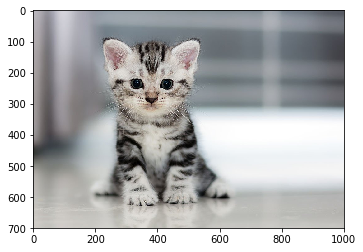

In [6]:
label_predict("cat.jpg")